# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Emp_EDA.csv')

In [3]:
df.shape

(1000000, 31)

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,18,Yes,Travel_Rarely,720,Sales,34,2,Technical Degree,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Yes,18,4,1,3,25,5,3,8,5,4,8
2,25,No,Non-Travel,1406,Support,3,2,Life Sciences,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Yes,48,1,3,4,13,2,3,5,1,1,3
3,38,Yes,Travel_Frequently,1316,Software,19,5,Other,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Yes,12,4,4,3,29,5,4,5,3,1,1
4,35,No,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,19,Yes,Travel_Rarely,389,Sales,22,1,Human Resources,2,Male,122,1,3,Healthcare Representative,3,Married,30138,241104,0,No,48,3,2,2,12,5,1,8,1,6,2
999996,24,No,Non-Travel,1248,Hardware,7,5,Life Sciences,2,Male,187,3,1,Developer,2,Divorced,39771,1073817,0,No,42,2,4,3,32,2,3,1,1,1,1
999997,55,No,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,No,26,3,4,1,29,4,4,28,19,16,26
999998,44,Yes,Non-Travel,1065,Research & Development,34,3,Human Resources,4,Female,102,2,1,Healthcare Representative,3,Married,9736,48680,7,Yes,25,3,3,4,20,2,3,2,2,1,2


## Checking For Outliers

In [5]:
l = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']


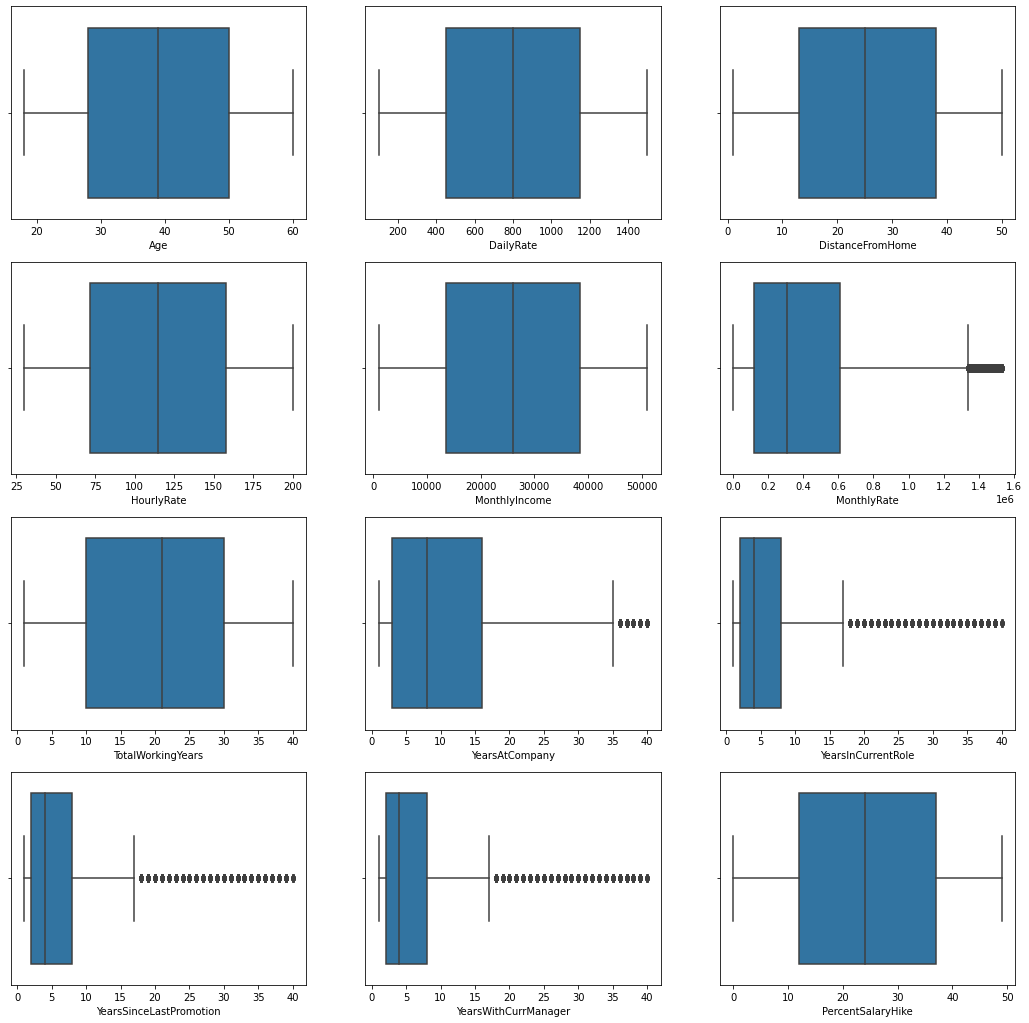

In [6]:
plt.figure(figsize = (18,18))
for i in range(len(l)):
    plt.subplot(4,3, i+1)
    sb.boxplot(data = df, x = df[l[i]])

### DATA CLEANING

In [7]:
df[df['YearsAtCompany'] > df['Age']][['Age', 'YearsAtCompany']]

,Age,YearsAtCompany
8,25,27
22,26,29
96,18,19
98,20,27
133,28,30
...,...,...
999867,25,26
999893,18,19
999907,19,28
999952,26,37


Observation: From the above output it can be observed that even though the employee Age is 25 but he works 27 years at the company like this there are about 34695 rows present, that shows impossible relation between them,so we can drop them.

In [8]:
df.drop(df[df['YearsAtCompany']>df['Age']].index,inplace = True)

In [9]:
df.shape

(965305, 31)

In [10]:
df[df['TotalWorkingYears'] >= df['Age']][['TotalWorkingYears', 'Age']]

,TotalWorkingYears,Age
1,25,18
10,29,20
14,33,23
17,37,30
38,36,26
...,...,...
999939,29,19
999957,27,27
999965,38,34
999975,29,22


Observation: From the above output we can observe that even though the employee Age is 18, the employee working for 25 years like this there are 112539 rows that shows impossible relation between them.So we can drop them.

In [11]:
df.drop(df[df['TotalWorkingYears'] >= df['Age']].index,inplace = True)

In [12]:
df.shape

(839380, 31)

In [13]:
df.groupby(["TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","Age"]).size().reset_index().tail(10)

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Age,0
224838,40,40,39,48,1
224839,40,40,39,54,1
224840,40,40,39,59,1
224841,40,40,39,60,1
224842,40,40,40,43,1
224843,40,40,40,51,1
224844,40,40,40,54,1
224845,40,40,40,57,2
224846,40,40,40,59,1
224847,40,40,40,60,1


Observation:
From the above output we can observe that the employee age is 43 but the employee is working for 40 years that means an employee started working since the employee was 3 years old that is impossible.At least a employee age should be 16 to start doing a job,so we can drop them.

In [14]:
df.drop(df[(df['Age']-df['TotalWorkingYears'])<=16].index,inplace = True)

In [15]:
df.groupby(["TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","Age"]).size().reset_index().tail(10)

,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Age,0
113807,40,40,35,59,1
113808,40,40,36,60,1
113809,40,40,37,57,1
113810,40,40,37,60,1
113811,40,40,38,59,1
113812,40,40,39,59,1
113813,40,40,39,60,1
113814,40,40,40,57,2
113815,40,40,40,59,1
113816,40,40,40,60,1


In [16]:
df.shape

(546221, 31)

After dropping all the unimportant data the final shape of our dataset is 546221 rows and 31 columns.

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
4,35,No,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1
7,37,No,Non-Travel,1077,Human Resources,16,5,Other,3,Female,142,2,3,Manager,2,Single,28591,114364,3,No,22,3,3,2,6,1,1,3,2,3,2
9,34,Yes,Travel_Frequently,1199,Hardware,10,2,Medical,2,Male,197,2,1,Manager,4,Divorced,22968,275616,2,No,2,1,4,1,7,4,3,6,3,5,3
11,48,No,Travel_Rarely,184,Human Resources,34,3,Other,3,Male,123,1,3,Human Resources,1,Married,16527,413175,1,Yes,14,2,4,2,17,6,2,11,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,20,No,Travel_Frequently,1472,Research & Development,41,3,Marketing,1,Male,200,3,4,Manager,4,Single,4627,4627,8,No,11,1,1,1,2,4,2,1,1,1,1
999993,60,Yes,Travel_Frequently,1290,Support,9,5,Marketing,3,Female,176,4,3,Manager,1,Divorced,25823,258230,0,Yes,16,3,1,1,31,3,1,17,12,17,13
999994,51,No,Non-Travel,1265,Hardware,50,3,Other,4,Female,154,2,3,Healthcare Representative,1,Married,12158,218844,0,No,2,3,3,4,15,2,2,12,6,1,10
999997,55,No,Non-Travel,1298,Support,33,5,Human Resources,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,No,26,3,4,1,29,4,4,28,19,16,26


### Running the AutoML to select the best algorithm


## Feature Selection


Pearson Correlation

<AxesSubplot:>

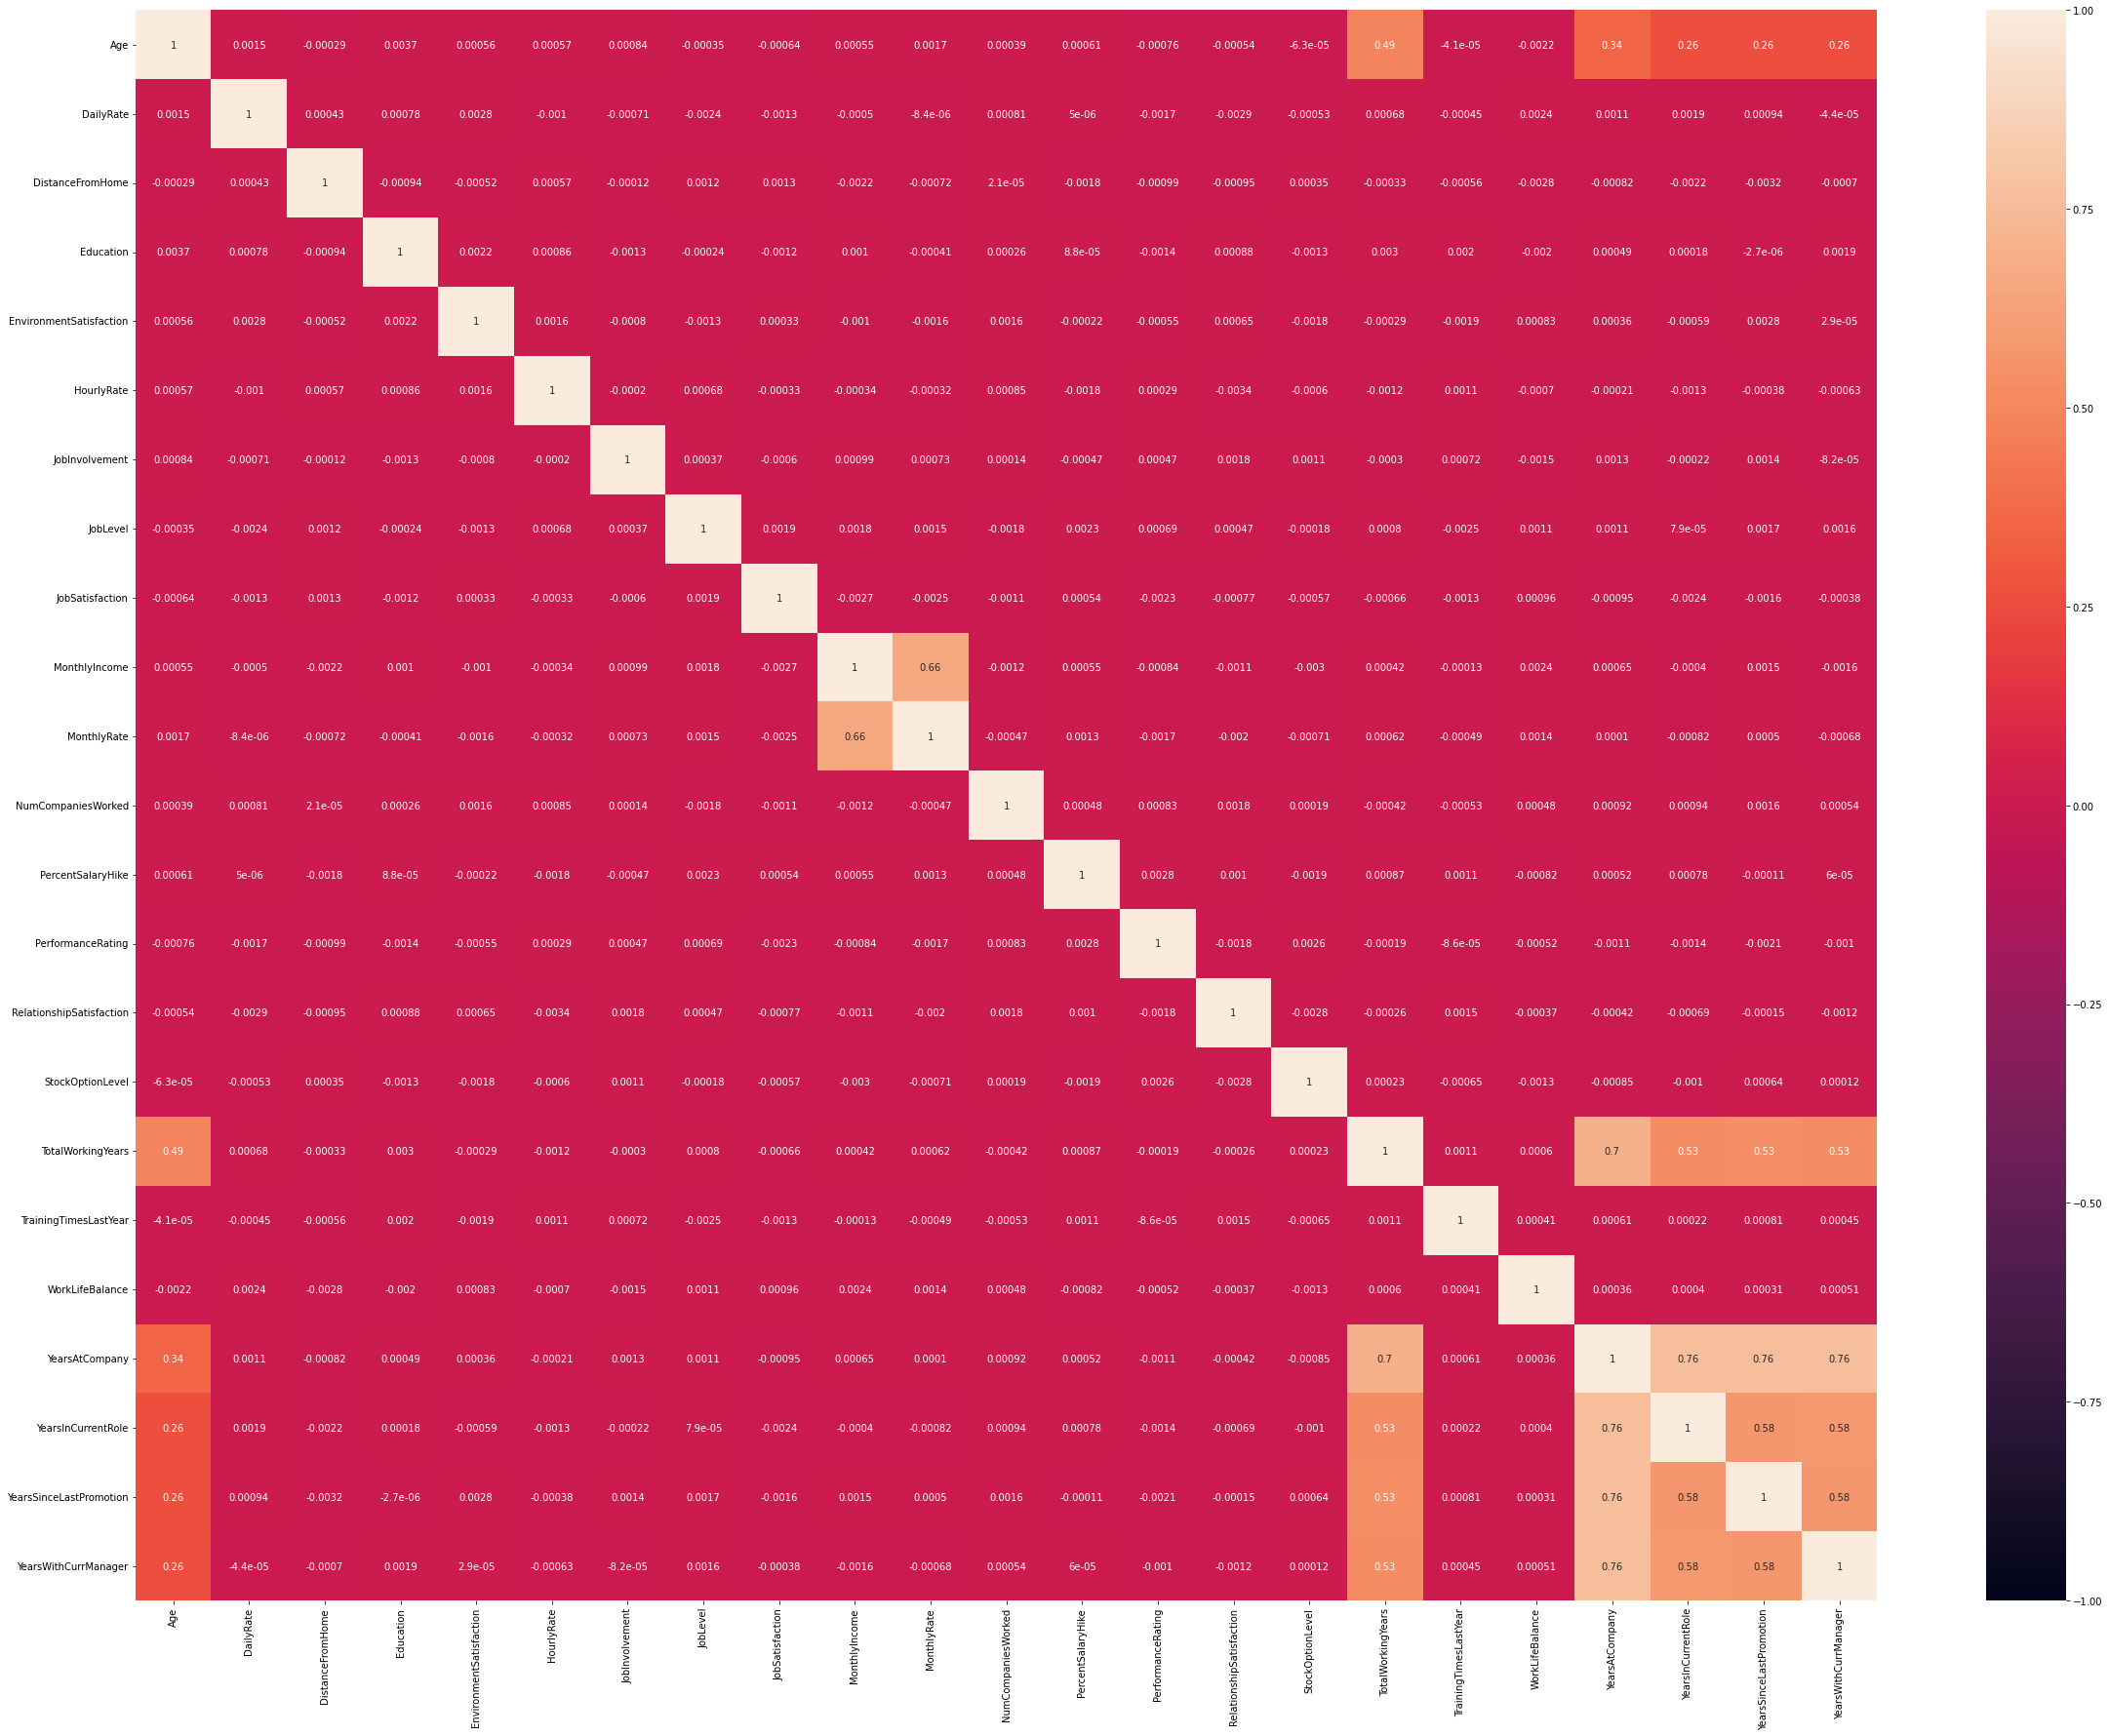

In [18]:
plt.figure(figsize = (40,30))
sb.heatmap(df.corr(), annot = True,vmin =-1,vmax =1)

In [19]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features=correlation(df,0.55)
print(corr_features)
print(len(set(corr_features)))

{'YearsInCurrentRole', 'MonthlyRate', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsSinceLastPromotion'}
5


By using "YearsAtCompany" column we will create another feature "Attrition_within_a_year" so that's why we are not dropping that column.In a heatmap we can see that "YearsInCurrentRole" and "YearsSinceLastPromotion" got the correlation value 0.58 so we will drop "YearsInCurrentRole".

In [21]:
df.drop(['MonthlyRate','YearsInCurrentRole','YearsWithCurrManager'],inplace = True,axis = 1)

In [22]:
df.shape

(546221, 28)

In [23]:
df.to_csv("df_automl.csv",index = False)

## One Hot Encoding

In [24]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes',1,0)

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.shape

(546221, 46)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546221 entries, 0 to 999998
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                546221 non-null  int64
 1   Attrition                          546221 non-null  int32
 2   DailyRate                          546221 non-null  int64
 3   DistanceFromHome                   546221 non-null  int64
 4   Education                          546221 non-null  int64
 5   EnvironmentSatisfaction            546221 non-null  int64
 6   HourlyRate                         546221 non-null  int64
 7   JobInvolvement                     546221 non-null  int64
 8   JobLevel                           546221 non-null  int64
 9   JobSatisfaction                    546221 non-null  int64
 10  MonthlyIncome                      546221 non-null  int64
 11  NumCompaniesWorked                 546221 non-null  int64
 12  Pe

## Feature Scaling(Normalization)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
for i in df.columns:
    df[i] = scaling.fit_transform(df[[i]])

In [29]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
7,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
999993,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999994,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999997,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
df.to_csv('Emp_Model_df.csv',index = False)